In [2]:
# include("./../src/Ising_model.jl")
# include("./../src/metropolis.jl")
# include("./../src/properties.jl")
include("./../src/MonteCarlo_ising.jl")
using Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...


  No Changes to `~/arnab/workspace/MonteCarlo_ising.jl/Project.toml`
  No Changes to `~/arnab/workspace/MonteCarlo_ising.jl/Manifest.toml`


In [49]:

J=1.0
lattice_n= MonteCarlo_ising.IsingModel(50,J, false)
display(lattice_n)
heatmap(lattice_n.lattice, xlabel="Column", ylabel="Row", title="Lattice with 75% Negative spins)", aspect_ratio=1)
savefig("./lattice_N.png")

Main.MonteCarlo_ising.IsingModel([-1 -1 … -1 1; -1 -1 … -1 -1; … ; -1 -1 … -1 -1; -1 -1 … 1 -1], 50, 1.0)

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/lattice_N.png"

![lattice picture](./lattice_N.png)

In [50]:
lattice_p= MonteCarlo_ising.IsingModel(50, J,true)
display(lattice_p)
heatmap(lattice_p.lattice, xlabel="Column", ylabel="Row", title="Lattice with 75% Positive spins)", aspect_ratio=1)
savefig("./lattice_P.png")

Main.MonteCarlo_ising.IsingModel([1 1 … 1 -1; 1 1 … -1 1; … ; 1 1 … 1 1; 1 1 … -1 1], 50, 1.0)

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/lattice_P.png"

![lattice oicture](./lattice_P.png)

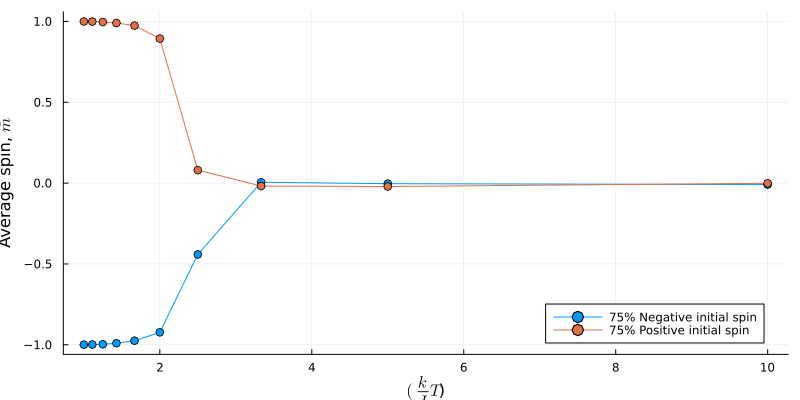

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/spin_with_time.png"

In [51]:
skiped_points=75000
total_points=200000
Bjs = range(0.1, stop=1.0, length=10)
ms_n, E_mean_n, E_stds_n = MonteCarlo_ising.get_spin_energy((lattice_n), Bjs,skiped_points,total_points)
ms_p, E_mean_p, E_stds_p = MonteCarlo_ising.get_spin_energy((lattice_p), Bjs,skiped_points,total_points)

plt = plot(size=(800, 400), legend=:bottomright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="Average spin, \$\\bar{m}\$")

plot!(1 ./ Bjs, ms_n, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, ms_p, marker=:o, label="75% Positive initial spin")

display(plt)
savefig("./spin_with_time.png")

# Heat Capacity
Heat capacity, $C_v=\frac{\sigma^2_E}{T^2}$
=$(<E^2>-<E>^2).\beta^2k^2$=$\sigma_{E/J}^2.(\beta J)^2
k^2$

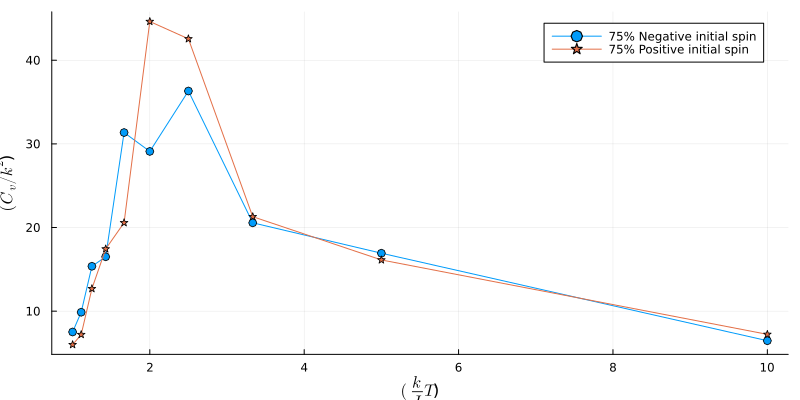

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/heat_capacity.png"

In [52]:
plt = plot(size=(800, 400), legend=:topright, xlabel="\$(\\frac{k}{J}T\$)", ylabel="\$(C_v/k^2\$)")

plot!(1 ./ Bjs, E_stds_n .* Bjs, marker=:o, label="75% Negative initial spin")
plot!(1 ./ Bjs, E_stds_p .* Bjs, marker=:s, label="75% Positive initial spin")

display(plt)
savefig("./heat_capacity.png")

In [53]:
using Plots
Ns = [150,120,100,80,  60, 50]
temperatures = [1.6, 2.0, 2.16, 2.34, 2.43, 2.76, 3.35,3.5,3.7,4.0,4.2,4.5]
T_by_Tc=temperatures./2.269
skipped_points = 10000
total_points = 200000
plt = plot(size=(800, 400), legend=:topright, xlabel="T/Tc", ylabel="Magnetic susceptibility, \$\\chi\$", grid=false)
J=1.0
for N in Ns
    chi_values = Float64[]
    for temperature in temperatures
        spin_array = MonteCarlo_ising.IsingModel(N,J,false)
        chi =MonteCarlo_ising.magnetic_susceptibility(spin_array, skipped_points, total_points, temperature)
        push!(chi_values, chi)
    end
    println(chi_values)
    println(T_by_Tc)

    plot!(T_by_Tc, chi_values, label="N=$N",linewidth=3,marker=:auto)
end
savefig("./magnetic_susceptibility.png")

[177.25843889438133, 70.95678985079492, 26.537431434218874, 3204.973914761033, 2814.45221911448, 1312.5970817055681, 496.84963834330097, 434.8036856795321, 334.02585414559815, 216.87252006666668, 163.92267067335004, 121.64040102404157]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[93.21438672894021, 43.714594791781636, 16.228736905503638, 2432.2705510121455, 1727.3402927135223, 896.5459246800577, 210.17159144060395, 131.52864029824565, 111.820832146752, 81.33707927923976, 62.983304393971046, 38.61711639766083]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[52.28905793246349, 35.79223845588786, 18.960397864937462, 1416.5397628690955, 1378.5942604816978, 483.72846800457654, 85.24102179418695, 62.066774534135334, 54.81548904637268, 31.589462699999995, 27.730976631077684, 16.9535013394152]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[24.54824972252201, 24.74841529482994, 8.805020544637555, 1095.4962053053307, 780.7579808195259, 177.6880627896167, 40.56678160742341, 24.30392450469925, 14.421875968172117, 13.483807136513162, 6.377727800751879, 5.410008305555557]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[6.024852439785705, 3.075006108491074, 2.8266483663756206, 613.4835697305942, 355.7576232257598, 77.3491266675142, 11.673555672514615, 5.609462979114452, 5.16010577682946, 3.4307662324561394, 1.4389502506265661, 1.4144392618583492]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


[0.4107718733846466, 7.607976558095392, 4.99606291205896, 358.70827439316236, 143.14754846523718, 18.523686657513345, 2.9516833307148453, 1.83239171849624, 2.917313570412516, 1.965686974736841, 1.1851543739348367, 0.6271297983625728]
[0.7051564565888057, 0.881445570736007, 0.9519612163948876, 1.031291317761128, 1.0709563684442487, 1.2163948876156896, 1.4764213309828118, 1.5425297487880123, 1.630674305861613, 1.762891141472014, 1.8510356985456147, 1.9832525341560157]


"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/magnetic_susceptibility.png"

![susceptibility vs Temperature](./magnetic_susceptibility.png)

In [54]:
plt = plot(size=(800, 400), legend=:topright, xlabel="T/Tc", ylabel="Magnetization, \$m\$", grid=false)
Ns = [50,70,100,140,170,200]
temperatures = [1.4,1.45,1.6,1.7,1.8,1.9, 2.0,2.08, 2.16,2.25, 2.34, 2.43,2.5, 2.76, 3.35]
T_by_Tc=temperatures./2.269
for N in Ns
    ms_values = Float64[]
    for temperature in temperatures
        spin_array = MonteCarlo_ising.IsingModel(N,1.0,true,0.98)
        ms, ms_squared = MonteCarlo_ising.magnetization(spin_array, skipped_points, total_points, temperature)
        push!(ms_values, ms)
    end
    println(ms_values)
    println(T_by_Tc)

    plot!(T_by_Tc, ms_values, label="N=$N",linewidth=2,marker=:auto)
end
savefig("./magnetization.png")

[0.9914968799999991, 0.989561263157894, 0.9795037936842099, 0.9700388842105262, 0.9595502863157896, 0.9428487284210526, 0.9159699831578948, 0.8948852168421053, 0.8436158821052633, 0.8068471031578949, 0.6306882105263157, 0.5123521894736842, 0.5799230821052632, 0.20984060210526317, 0.06375568421052633]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9904586616541351, 0.989066455424275, 0.9806735789473683, 0.9694157486573578, 0.9575925220193341, 0.9376433018259936, 0.9207515767991408, 0.8872635488721803, 0.850519531686359, 0.7700057164339419, 0.7225305499462943, 0.6567418410311494, 0.6177259226638024, 0.3626313963480129, 0.1317421224489796]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9905098968421051, 0.9876060526315787, 0.9795620084210526, 0.9704179168421053, 0.9588015894736842, 0.9395435978947368, 0.9179630115789474, 0.9001420673684211, 0.882880972631579, 0.8407114031578947, 0.7936364515789474, 0.762422777894737, 0.7018495894736841, 0.5170820473684211, 0.24288392421052632]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9878209656283561, 0.985864015037594, 0.9783447094522019, 0.9688056025778734, 0.9594587105263156, 0.945831335123523, 0.928719261546724, 0.9118940649838885, 0.8949205639097743, 0.8673169930182599, 0.8472487271750805, 0.8039124516648766, 0.7906124237379163, 0.6821751299677766, 0.4587957330827068]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9870071517027865, 0.9833510744855218, 0.9755854580222182, 0.9697038787106175, 0.9592324680386085, 0.9489302724458204, 0.9371382017847386, 0.9199879213258058, 0.9037669426334, 0.883986077581497, 0.8635065507193589, 0.8384146661810236, 0.8259360801311237, 0.7388041300309598, 0.557274209797851]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


[0.9831890226315788, 0.9832779123684213, 0.9724126926315789, 0.964205325263158, 0.9602811207894735, 0.9486431363157894, 0.9370392965789474, 0.9247814610526316, 0.9163893421052632, 0.8930797921052631, 0.8815432584210525, 0.8668149992105265, 0.8497882405263157, 0.7903874221052631, 0.6406290957894738]
[0.6170118995152049, 0.639048038783605, 0.7051564565888057, 0.749228735125606, 0.7933010136624064, 0.8373732921992066, 0.881445570736007, 0.9167033935654473, 0.9519612163948876, 0.9916262670780078, 1.031291317761128, 1.0709563684442487, 1.1018069634200087, 1.2163948876156896, 1.4764213309828118]


"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/magnetization.png"

![magnetization vs Temperature](./magnetization.png)

# Algorithm
1. choose the current state $\mu$

2. pick a random particle on the lattice and flip the spin sign. call the state $\nu$
we will calculate the probability $P(\mu --> \nu)$ to decide that we will accept the new state or not.

3. If $E_{\nu}> E_{\mu}$ , then set the $P(\nu-->\mu)$=1 and using the detailed balance algorithm , $P(\mu-->\nu)=e^{-\beta(E_{\nu}-E_{\mu})}$
    if $E_{\nu}< E_{\mu}$, then set $P(\mu-->\nu)$=1, which still satifies the detailed balalnce.
4. Change to state $\nu$ (i.e you flipped the spin of the particale) with the probbality outlined in 3.
5. Go back to step 1. Repeat the whole process many times untill the state reaches the equilibrium. 

In [55]:
Ns = [100, 90,80, 70, 60, 50]
#with 75 percent initial negative spin without taking absolute value of spin
using Plots
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=false)
J=0.8
for N in Ns
    lattice_n= MonteCarlo_ising.IsingModel(N,J,false)
    spin_per_site,energies,spins=MonteCarlo_ising.metropolis(lattice_n,100000,1.0,MonteCarlo_ising.energy_manual(lattice_n))
    plot!(spins / N^2, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=true,label="N=$N")
end
savefig("./metropolis_plot_negative_spin_N.png")

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/metropolis_plot_negative_spin_N.png"

![spin variation](./metropolis_plot_negative_spin_N.png)

In [56]:
Ns = [100, 90,80, 70, 60, 50]
#with 75 percent initial negative spin without taking absolute value
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Energy per site", grid=false)
for N in Ns
    lattice_n= MonteCarlo_ising.IsingModel(N, 0.7,false)
    spin_per_site,energies,spins=MonteCarlo_ising.metropolis(lattice_n,100000,1.0,MonteCarlo_ising.energy_manual(lattice_n))
    plot!(energies/ N^2, xlabel="Time steps", ylabel="Energy per site", grid=true,label="N=$N")
end
savefig("./metropolis_plot_energy_N.png")

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/metropolis_plot_energy_N.png"

![spin variation](./metropolis_plot_energy_N.png)

In [57]:
Ns = [100, 90,80, 70, 60, 50]
#with 75 percent initial negative spin without taking absolute value
plt = plot(size=(800, 400), legend=:topright, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=false)
for N in Ns
    lattice_p= MonteCarlo_ising.IsingModel(N, 0.7,true)
    spin_per_site,energies,spins=MonteCarlo_ising.metropolis(lattice_p,100000,0.86,MonteCarlo_ising.energy_manual(lattice_p))
    plot!(spins / N^2, xlabel="Time steps", ylabel="Average spin, \$\\bar{m}\$", grid=true,label="N=$N")
end
savefig("./metropolis_plot_positive_spin_N.png")

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/metropolis_plot_positive_spin_N.png"

![spin variation](./metropolis_plot_positive_spin_N.png)

In [9]:
Ns = [45, 150]
plt = plot(size=(800, 500), legend=:topright, xlabel="T/Tc", ylabel="Cumulant", grid=false)

temperatures = [1.8 ,2.0,2.1, 2.16,2.24,2.29, 2.34,2.4] 
T_by_Tc=temperatures./2.269
skipped_points = 10000
total_points = 400000
for N in Ns
    cumulant_values = []
    for temperature in temperatures
        spin_array = MonteCarlo_ising.IsingModel(N,1.0,false,0.7)
        cumulant = MonteCarlo_ising.cumulant_spin(spin_array, skipped_points, total_points, temperature)
        push!(cumulant_values, cumulant)
    end
    plot!(T_by_Tc,cumulant_values,label="N=$N",linewidth=2,marker=:auto)
end



savefig("./cumulants.png")

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/cumulants.png"

![cumulant](./cumulants.png)

300-element Vector{Any}:
 0.9590764218729679
 0.9288270789406088
 0.9001301645203199
 0.8687844940211836
 0.853567498794517
 0.7885415751237189
 0.7660426571291868
 0.7972075703411436
 0.7291841138547129
 0.6691084674155008
 ⋮
 0.06648157741776735
 0.10074190425983134
 0.07932808671261797
 0.23399117367161998
 0.007146106744382977
 0.048262410406805636
 0.0031836943213360974
 0.03963524682162312
 0.009286171006859403

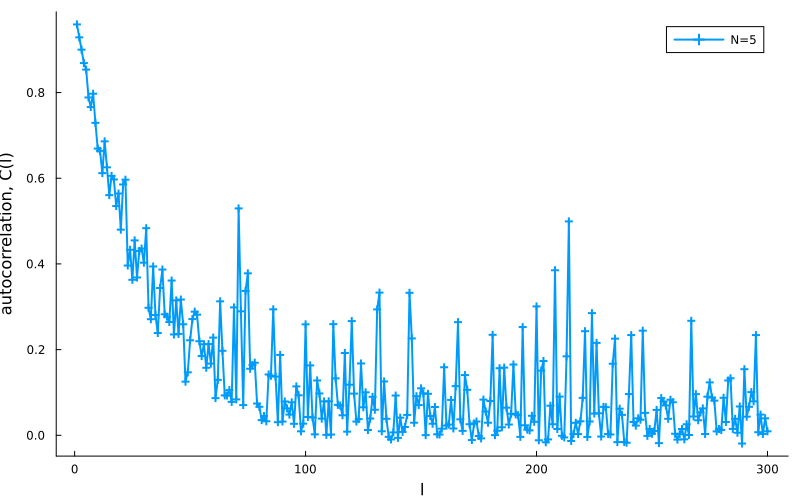

In [59]:
l=300
J=1.0
N=5
lattice_n=MonteCarlo_ising.IsingModel(N,J, false,0.99)  
autocorr=[]
plt = plot(size=(800, 500), legend=:topright, xlabel="l", ylabel="autocorrelation, C(l)", grid=false)
# autocorrelation_values = MonteCarlo_ising.autocorrelation_montecarlo(lattice_n,total_points,5,1.0)
for i in 1:l
    autocorrelation_values = MonteCarlo_ising.autocorrelation_montecarlo(lattice_n,total_points,i,1.0)
    push!(autocorr,autocorrelation_values)
end
display(autocorr)
plot!(autocorr,label="N=$N",linewidth=2,marker=:auto)

In [60]:
savefig("./autocorrelation.png")

"/Users/arnab/arnab/workspace/MonteCarlo_ising.jl/example/autocorrelation.png"